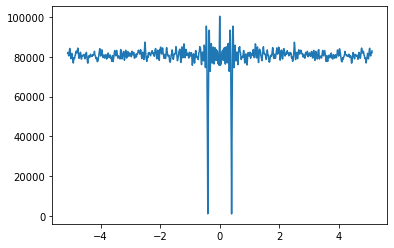

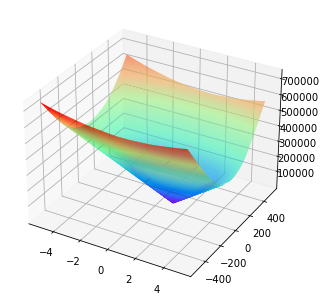

-40.87 -40.87 -4512 -50.72


In [1]:
# -*- coding: utf-8 -*-
"""
Created on Wed Oct 31 18:40:08 2018

@author: user
"""
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def F1(t):
    return 0.063*(t**3)-5.284*(t**2)+4.887*t+412+np.random.normal(0,1)

def F2(t,A,B,C,D):
    return A*(t**B)+C*np.cos(D*t)+np.random.normal(0,1,t.shape)

def Energy(b2,T,A,B,C,D):
    return np.sum(abs(b2-F2(T,A,B,C,D)))

n = 1000
#A = np.zeros((n,5))
#b = np.zeros((n,1))
#for i in range(n):
#    t = np.random.random()*100
#    b[i] = F1(t)
#    A[i,0]= t**4
#    A[i,1]= t**3
#    A[i,2]= t**2
#    A[i,3]= t
#    A[i,4]= 1
#x = np.linalg.lstsq(A,b)[0]#求Ax=b --> Ax-b之最小平方 return the least-squares solution to a linear matrix equation
#print(x)

T = np.random.random((n,1))*100 #why*100
b2 = F2(T,0.6,1.2,100,0.4)
ene = np.zeros(511+512+1)#負+正+0 = 1024
ene2 = np.zeros((1024,1024))
count = 0

for i in range(-511, 513):
    i /=100
    ene[count] = Energy(b2,T,0.6,1.2,100,i)
    count+=1
m = 0
for a in range(-511, 513):
    n = 0
    for c in range(-511, 513):
        at = a #at is a dummy for a
        at/=100
        ene2[m][n] = Energy(b2,T,at,1.2,c,0.4)
        n+=1
    m+=1

x = np.arange(-5.11, 5.13, 0.01)
plt.plot(x, ene)

yc = np.arange(-511,513)#for a
xa = np.arange(-5.11,5.13,0.01)#for c
xa, yc = np.meshgrid(xa, yc)
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(xa, yc, ene2, rstride=1, cstride=1, cmap='rainbow')
plt.show()
#print(Energy(b2,T,0.5,1.2,100,0.4))

'''GenAL'''
pop = np.random.randint(0,2,(10000,40))
fit = np.zeros((10000,1))

for generation in range(10):
    for i in range(10000):
        gene = pop[i,:]
        A = (np.sum(2**np.arange(10)*gene[:10]-511)/100)#將10個bit轉成-5.11~5.12
        B = (np.sum(2**np.arange(10)*gene[10:20]-511)/100)
        C = (np.sum(2**np.arange(10)*gene[20:30]-511))
        D = (np.sum(2**np.arange(10)*gene[30:40]-511)/100)
        fit[i] = Energy(b2,T,A,B,C,D)
    sortf = np.argsort(fit[:,0]) #回傳由小到大(energy)的原index
    pop = pop[sortf,:]#將其重新排序
    for i in range(100, 10000):
        fid = np.random.randint(0,100)#father id
        mid = np.random.randint(0,100)
        while mid == fid:#f, m id same --> generate again
            mid = np.random.randint(0,100)
        mask = np.random.randint(0,2,(1,40))
        son = pop[mid,:]#call mother's gen to son
        father = pop[fid,:]#call father's gen
        son[mask[0,:] == 1] = father[mask[0,:]==1]#1的改成父親的?
        pop[i,:] = son#把第i個人的基因copy掉
    for i in range(1000):#挑1000個突變
        m = np.random.randint(0,10000)
        n = np.random.randint(0,40)
        pop[m,n] = 1 - pop[m,n]#change第m個人的第n個基因
'''last 10000 people'''
for i in range(10000):
    gene = pop[i,:]
    A = (np.sum(2**np.arange(10)*gene[:10]-511)/100)#將10個bit轉成-5.11~5.12
    B = (np.sum(2**np.arange(10)*gene[10:20]-511)/100)
    C = (np.sum(2**np.arange(10)*gene[20:30]-511))
    D = (np.sum(2**np.arange(10)*gene[30:40]-511)/100)
    fit[i] = Energy(b2,T,A,B,C,D)
sortf = np.argsort(fit[:,0]) #回傳由小到大(energy)的原index
pop = pop[sortf,:]#將其重新排序

gene = pop[0,:]
A = (np.sum(2**np.arange(10)*gene[:10]-511)/100)#將10個bit轉成-5.11~5.12
B = (np.sum(2**np.arange(10)*gene[10:20]-511)/100)
C = (np.sum(2**np.arange(10)*gene[20:30]-511))
D = (np.sum(2**np.arange(10)*gene[30:40]-511)/100)
print(A,B,C,D)